# EXAMEN TRAITEMENT ET ANALYSE DE DONNEES CERTIFICATION CFD, Mohamed Falilou FALL

# Question 1

## 1 - Importation des bibliotheques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## 2- Connection de Google Collab et Google Drive







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3- Importation du jeu de donnees Taxi

In [3]:
data = pd.read_csv('/content/taxis.csv')

In [4]:
data.head()

,Unnamed: 0,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [88]:
data.tail()

,Unnamed: 0,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6428,6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [5]:
# Vue de toutes les colonnes
data.columns

Index(['Unnamed: 0', 'pickup', 'dropoff', 'passengers', 'distance', 'fare',
       'tip', 'tolls', 'total', 'color', 'payment', 'pickup_zone',
       'dropoff_zone', 'pickup_borough', 'dropoff_borough'],
      dtype='object')

# Question 2 : Exploratory Data Analysis

In [6]:
# Verification des informations de la Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6433 non-null   int64  
 1   pickup           6433 non-null   object 
 2   dropoff          6433 non-null   object 
 3   passengers       6433 non-null   int64  
 4   distance         6433 non-null   float64
 5   fare             6433 non-null   float64
 6   tip              6433 non-null   float64
 7   tolls            6433 non-null   float64
 8   total            6433 non-null   float64
 9   color            6433 non-null   object 
 10  payment          6389 non-null   object 
 11  pickup_zone      6407 non-null   object 
 12  dropoff_zone     6388 non-null   object 
 13  pickup_borough   6407 non-null   object 
 14  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 754.0+ KB


In [7]:
# La taille du Dataset
data.shape

(6433, 15)

In [8]:
# Description generale des variables numerique du jeu de donnees
data.describe()

,Unnamed: 0,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,3216.000000,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1857.191473,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1608.000000,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,3216.000000,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,4824.000000,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6432.000000,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [9]:
# isolement des variables 'tip'(pourboires) et 'total'(la somme totale versee par le client tous frais compris) dans un dataframe nomme "data_final"

data_final = data[['tip', 'total']]
data_final

,tip,total
0,2.15,12.95
1,0.00,9.30
2,2.36,14.16
3,6.15,36.95
4,1.10,13.40
...,...,...
6428,1.06,6.36
6429,0.00,58.80
6430,0.00,17.30
6431,0.00,6.80


In [10]:
# Description de "data_final"
data_final.describe()


,tip,total
count,6433.00000,6433.000000
mean,1.97922,18.517794
std,2.44856,13.815570
min,0.00000,1.300000
25%,0.00000,10.800000
50%,1.70000,14.160000
75%,2.80000,20.300000
max,33.20000,174.820000


In [11]:
data.columns

Index(['Unnamed: 0', 'pickup', 'dropoff', 'passengers', 'distance', 'fare',
       'tip', 'tolls', 'total', 'color', 'payment', 'pickup_zone',
       'dropoff_zone', 'pickup_borough', 'dropoff_borough'],
      dtype='object')

## Analyse univariee

In [12]:
import plotly.express as px
px.box(data_final['tip'])


INTERPRETATION :
 1- La mediane est plus proche du bord superieure (Q3) cela indique une distribution asymetrique positive.
 2- La moustache superieure est beaucoup plus longue que celle inferieure ce qui signifie la presence d'un asymetrie
3- La largeur de la boite indique une large dispersion des donnees de la variable 'tip'
4 - Nous sommes en presence de nombreux outliers

In [13]:
import plotly.express as px
px.box(data_final['total'])



INTERPRETATION
1- La mediane est plus proche du bord superieure (Q1) cela indique une distribution asymetrique positive.
2- La moustache superieure est beaucoup plus longue que celle inferieure ce qui signifie la presence d'un asymetrie
3- La largeur de la boite indique une large dispersion des donnees de la variable 'total'
4- Nous sommes en presence de nombreux outliers

## Analyse bivariee entre 'tips' et 'total'

<Axes: xlabel='tip', ylabel='total'>

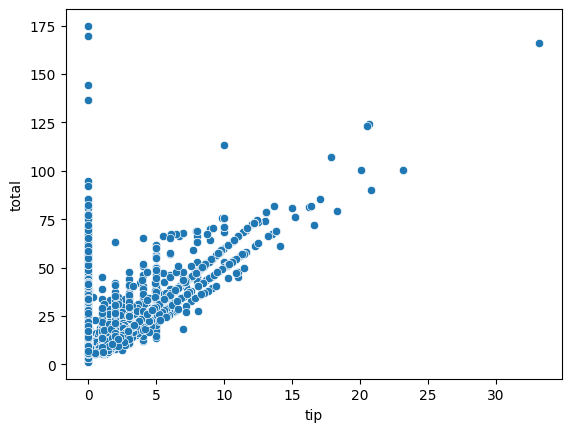

In [14]:
sb.scatterplot(x=data_final['tip'],y=data_final['total'])

INTERPRETATION
1-Nous observons une relation positive, les point montent de gauche a droite indiquant que
2-lorsque la variable 'tip' augmente, la variable 'total' tend a augmenter
3-La relation est forte entre les 2 variables 'tip' et 'total', les point sont proches d'une ligne droite(pente)
4-Les points suivent une tendance qui peut être approximée par une ligne droite.

## Multivariate analysis

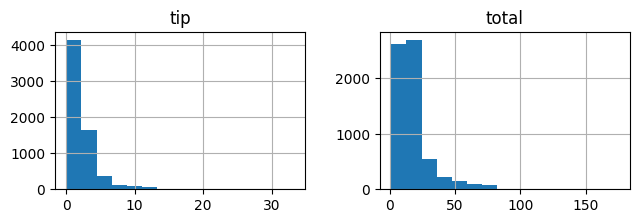

In [15]:
data_final.hist(bins=15,figsize=(20, 10), layout=(4, 5)
);

<Axes: >

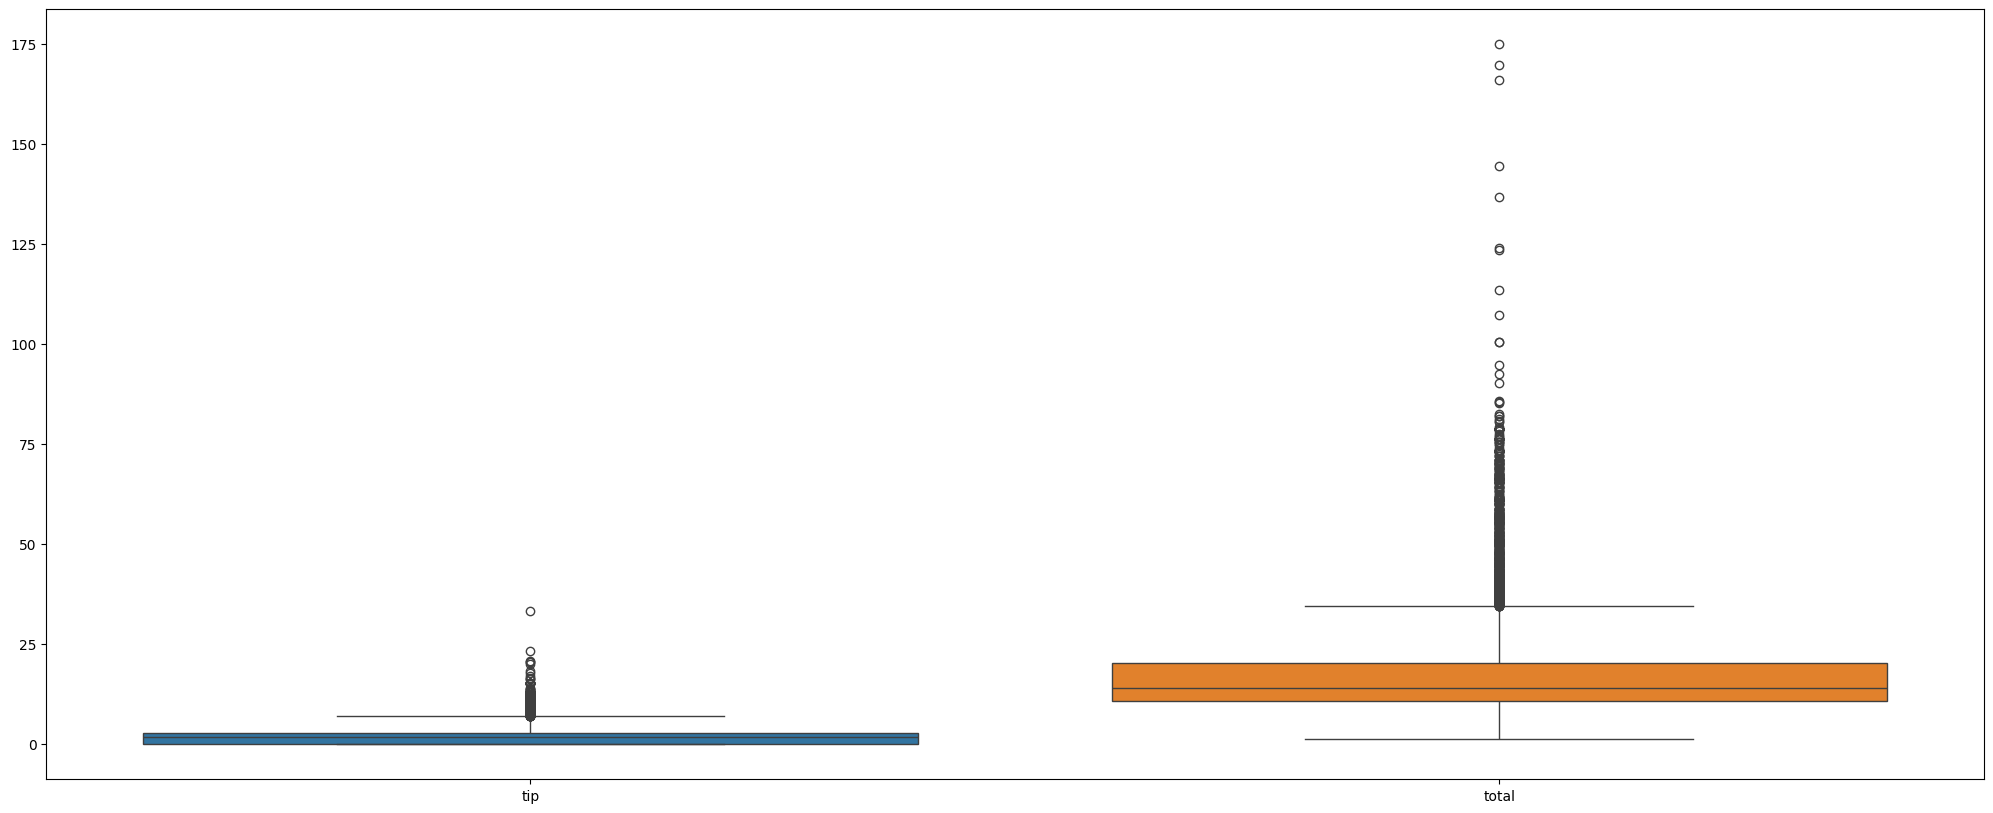

In [16]:
plt.figure(figsize=(25,10))
sb.boxplot(data=data_final, orient="v")

## Statistical relationship

In [17]:
data_final.corr()

,tip,total
tip,1.000000,0.646186
total,0.646186,1.000000


<Figure size 200x500 with 0 Axes>

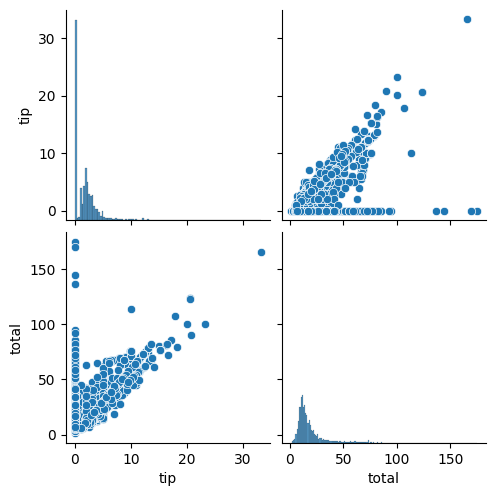

In [18]:
plt.figure(figsize=(2,5))
sb.pairplot(data_final)

In [19]:
data_cor = data_final.corr()
data_cor

,tip,total
tip,1.000000,0.646186
total,0.646186,1.000000


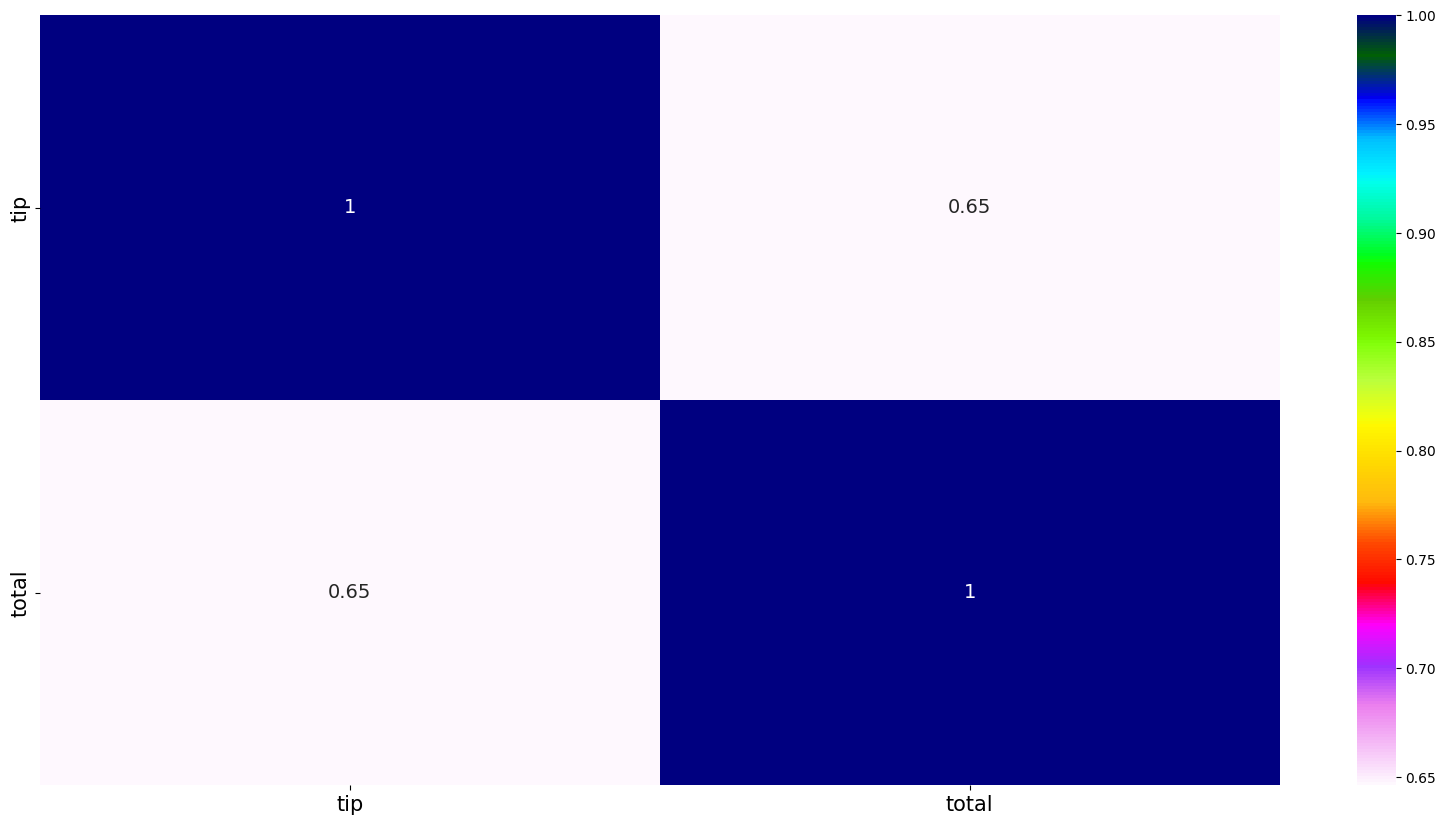

In [20]:
sb.heatmap(data_cor, xticklabels = data_cor.columns.values, yticklabels = data_cor.columns.values, annot = True, annot_kws={'size':14},cmap='gist_ncar_r')
heat_map = plt.gcf()
heat_map.set_size_inches(20,10)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Nous sommes en presence d'une correlation positive forte comprise entre [0.5 et 1]

## Pandas Profiling

In [21]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=4815535c2a57defb3cb820e97b5ad354e84477aeca3f4472eb45744367bda347
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [22]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data_final, title="Pandas Profiling Taxis Report", explorative=True)
profile.to_file('report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning:

Try running command: 'pip install --upgrade Pillow' to avoid ValueError

/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Question 3 :  Verification des valeures manquantes , doublons et outliers

In [23]:
# Verification des valeures manquantes
data_final.isnull().sum()

tip      0
total    0
dtype: int64

In [27]:
# Verification des doublons possible qu'a partir du DataFrame d'origine
# Nous n'avons pas de doublons dans le Dataset
data.duplicated().sum()

0

## Traitement des valeures extremes

In [28]:
for  i in data_final:
  print(f"{i}=>{data_final[i].skew()}")

tip=>2.665151563396707
total=>3.0933326288688754


<Axes: >

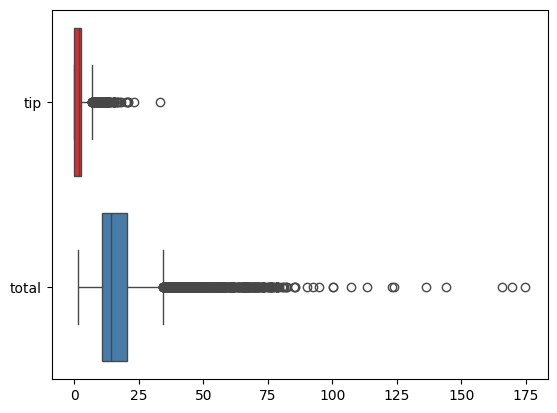

In [30]:
sb.boxplot(data=data_final, orient="h", palette="Set1")

## Vue et reglages des valeures extremes bases sur les Quartiles


In [66]:

data_final = data[['tip', 'total']]
data_final.head()

,tip,total
0,2.15,12.95
1,0.00,9.30
2,2.36,14.16
3,6.15,36.95
4,1.10,13.40


In [65]:
for  i in data_final:
  print(f"{i}=>{data_final[i].skew()}")

tip=>2.665151563396707
total=>3.0933326288688754


<Axes: >

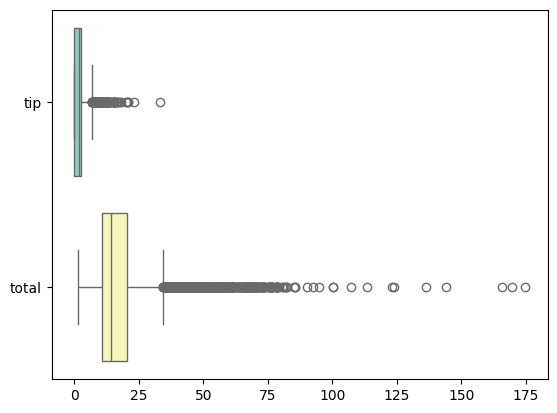

In [70]:
sb.boxplot(data=data_final, orient="h", palette="Set3")

In [72]:
print(data_final['tip'].quantile(0.10))            #|--0.0-|---4.45------|
print(data_final['tip'].quantile(0.90))

print(data_final['total'].quantile(0.10))            #|--8.76-|---33.36------|
print(data_final['total'].quantile(0.90))

0.0
4.45
8.768000000000002
33.36


In [76]:
# Verification des skewness avant reglage
print(data_final['tip'].skew())
print(data_final['total'].skew())

# Les skwness des colonnes 'total' et 'tip' ne sont pas respectivement comprisent entre -1 et 1

2.665151563396707
3.0933326288688754


In [78]:
# Reglages des outliers

data_final["tip"] = np.where(data_final["tip"] <0.0, 4.45,data_final['tip'])
data_final["total"] = np.where(data_final["total"] >8.76, 33.36,data_final['total'])


<ipython-input-78-06f64e145266>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-06f64e145266>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
# Verification des skewness apres reglages
print(data_final['tip'].skew())
print(data_final['total'].skew())

2.665151563396707
-2.6809171594802925


In [90]:
print(data['total'].max())
print(data['tip'].max())

174.82
33.2


In [93]:
# Trouvons la date correspondant à la valeur maximum 174.82$
valeur_a_trouver_total = 174.82
date_a_trouver = data.loc[data['total'] == 174.82, 'pickup'].values[0]

print(f"\nLa date correspondant à la valeur {valeur_a_trouver_total} est : {date_a_trouver}")


valeur_a_trouver_tip = 33.2
date_a_trouver = data.loc[data['tip'] == 33.2, 'pickup'].values[0]

print(f"\nLa date correspondant à la valeur {valeur_a_trouver_tip} est : {date_a_trouver}")






La date correspondant à la valeur 174.82 est : 2019-03-17 16:59:17

La date correspondant à la valeur 33.2 est : 2019-03-12 19:52:36


##
-  La date du 2019-03-17 correspondait a la Fete de Saint Patrick a New York (Sama dëkk) , 16:59 est en general un moment de rush ou tout le monde cherche un taxi apres les festivites (la parade) qui se termine a 17:00 . Le client a ete pris dans le Quartier du 'Queens'

- 2019-03-12  Correspondait au 'Forum Mondial sur la remuneration equitable' qui s'est tenu a New York ce jour la. Le client venait du Forum